In [3]:
from make_tfrecords import *

# 실행
tfroecord_sample = TFrecord_Create_For_Unet(train_test = 'train',
                        img_folder = '/notebooks/Unet_membrane/unet/data/membrane/train/new_data/',
                        img_type = 'png',
                        label_name = 'labels',
                        tf_record_pre_fix = 'membrane_train',
                        nx = 512,
                        ny = 512
                       )


tfrecord = TFrecord_Create_For_Unet(train_test = 'test',
                        img_folder = '/notebooks/Unet_membrane/unet/data/membrane/test2/',
                        img_type = 'png',
                        label_name = '_predict',
                        tf_record_pre_fix = 'tfrecords',
                        nx = 512,
                        ny = 512
                       )
                       

original images:  30
ground truth images:  30
Tfrecord generation finished
original images:  2
ground truth images:  2
Tfrecord generation finished


In [7]:
import tensorflow as tf
import tensorflow.contrib.image.ops
from PIL import Image
import numpy as np
import glob

from modeling import *
from dataprovider import *
from make_tfrecords import *
from layer import *

data_provider = Tfrecord_ImageDataProvider(                 
                                        train_tfrecord_path = '/notebooks/Unet/unet_tfrecord/membrane_train_train.tfrecords', 
                                        test_tfrecord_path = '/notebooks/Unet/unet_tfrecord/tfrecords_test.tfrecords', 
                                        channels = 1, train_batch_size = 4, test_batch_size = 1, 
                                        nx = 512, ny = 512, n_imgs = 30)
                                     

In [19]:
from modeling import *
from dataprovider import *
from make_tfrecords import *
from layer import *

net = Unet(cost = "dice_coefficient", layers=5, features_root=64, channels=1) 
trainer = Trainer(net, data_provider = data_provider, batch_size=4, validation_batch_size = 1,optimizer="adam", lr = 0.001, opt_kwargs={})
path = trainer.train(output_path='/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2/', prediction_path = '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2/', training_iters=8, epochs=40)


2019-03-13 08:19:09,976 Layers 5, features 64, filter size 3x3, pool size: 2x2
2019-03-13 08:19:12,996 Removing '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2'
2019-03-13 08:19:13,029 Removing '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2'
2019-03-13 08:19:14,318 Allocating '/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/model2'


134651.19


2019-03-13 08:19:16,839 Validation loss=0.3358
2019-03-13 08:19:16,914 Start optimization
2019-03-13 08:19:19,674 Iter 1, Minibatch Loss= 0.3568
2019-03-13 08:19:20,603 Iter 2, Minibatch Loss= 0.3352
2019-03-13 08:19:21,529 Iter 3, Minibatch Loss= 0.3109
2019-03-13 08:19:22,457 Iter 4, Minibatch Loss= 0.3003
2019-03-13 08:19:23,391 Iter 5, Minibatch Loss= 0.2895
2019-03-13 08:19:24,312 Iter 6, Minibatch Loss= 0.2800
2019-03-13 08:19:25,233 Iter 7, Minibatch Loss= 0.2748
2019-03-13 08:19:26,154 Iter 8, Minibatch Loss= 0.2674
2019-03-13 08:19:26,155 Epoch 0, Average loss: 0.3234, learning rate: 0.0010
2019-03-13 08:19:26,288 Validation loss=0.2854
2019-03-13 08:19:28,737 Iter 9, Minibatch Loss= 0.2682
2019-03-13 08:19:29,659 Iter 10, Minibatch Loss= 0.2538
2019-03-13 08:19:30,593 Iter 11, Minibatch Loss= 0.2487
2019-03-13 08:19:31,517 Iter 12, Minibatch Loss= 0.2482
2019-03-13 08:19:32,440 Iter 13, Minibatch Loss= 0.2457
2019-03-13 08:19:33,366 Iter 14, Minibatch Loss= 0.2401
2019-03-13 

2019-03-13 08:21:26,782 Iter 115, Minibatch Loss= 0.0854
2019-03-13 08:21:27,705 Iter 116, Minibatch Loss= 0.0803
2019-03-13 08:21:28,628 Iter 117, Minibatch Loss= 0.0860
2019-03-13 08:21:29,551 Iter 118, Minibatch Loss= 0.0809
2019-03-13 08:21:30,470 Iter 119, Minibatch Loss= 0.0805
2019-03-13 08:21:31,397 Iter 120, Minibatch Loss= 0.0836
2019-03-13 08:21:31,399 Epoch 14, Average loss: 0.0751, learning rate: 0.0010
2019-03-13 08:21:31,533 Validation loss=0.1536
2019-03-13 08:21:33,809 Iter 121, Minibatch Loss= 0.0843
2019-03-13 08:21:34,733 Iter 122, Minibatch Loss= 0.0839
2019-03-13 08:21:35,655 Iter 123, Minibatch Loss= 0.0813
2019-03-13 08:21:36,577 Iter 124, Minibatch Loss= 0.0794
2019-03-13 08:21:37,501 Iter 125, Minibatch Loss= 0.0778
2019-03-13 08:21:38,425 Iter 126, Minibatch Loss= 0.0788
2019-03-13 08:21:39,349 Iter 127, Minibatch Loss= 0.0881
2019-03-13 08:21:40,273 Iter 128, Minibatch Loss= 0.0793
2019-03-13 08:21:40,274 Epoch 15, Average loss: 0.0717, learning rate: 0.0010

2019-03-13 08:23:35,718 Iter 229, Minibatch Loss= 0.0615
2019-03-13 08:23:36,642 Iter 230, Minibatch Loss= 0.0589
2019-03-13 08:23:37,563 Iter 231, Minibatch Loss= 0.0584
2019-03-13 08:23:38,485 Iter 232, Minibatch Loss= 0.0651
2019-03-13 08:23:38,486 Epoch 28, Average loss: 0.0528, learning rate: 0.0010
2019-03-13 08:23:38,617 Validation loss=0.1378
2019-03-13 08:23:40,948 Iter 233, Minibatch Loss= 0.0633
2019-03-13 08:23:41,868 Iter 234, Minibatch Loss= 0.0598
2019-03-13 08:23:42,795 Iter 235, Minibatch Loss= 0.0657
2019-03-13 08:23:43,717 Iter 236, Minibatch Loss= 0.0637
2019-03-13 08:23:44,640 Iter 237, Minibatch Loss= 0.0631
2019-03-13 08:23:45,559 Iter 238, Minibatch Loss= 0.0550
2019-03-13 08:23:46,482 Iter 239, Minibatch Loss= 0.0565
2019-03-13 08:23:47,405 Iter 240, Minibatch Loss= 0.0562
2019-03-13 08:23:47,406 Epoch 29, Average loss: 0.0547, learning rate: 0.0010
2019-03-13 08:23:47,540 Validation loss=0.1386
2019-03-13 08:23:49,866 Iter 241, Minibatch Loss= 0.0548
2019-03-1

## Model output with Dice loss

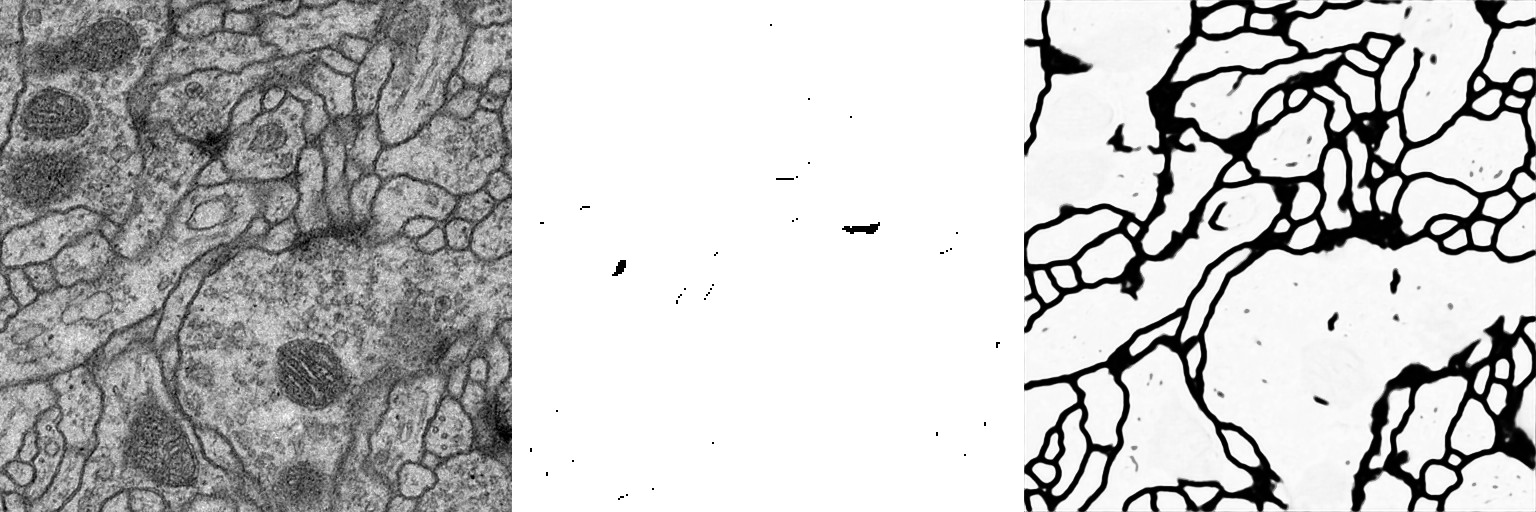

In [20]:
output = Image.open('/home/Markkim/Git/Tensorflow/Unet_modified/output/membrane/prediction2/epoch_19.jpg')
output

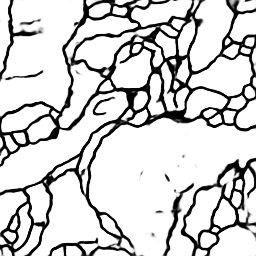

In [25]:
ground_truth = Image.open('/home/Markkim/28.labels.png')
ground_truth

## Original code output